<a href="https://colab.research.google.com/github/htharshht/The-Sparks-Foundation-Tasks/blob/main/Task3_EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis - Retail***

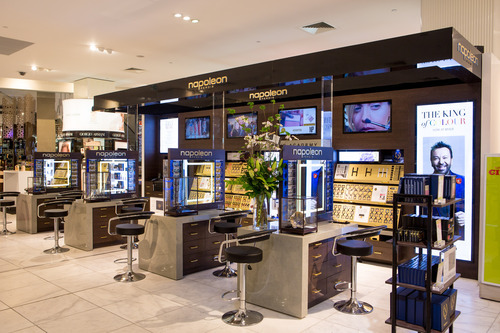


**Author :** *Harshit Tiwari*

**GitHub:** https://github.com/htharshht/The-Sparks-Foundation-Tasks

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px        # will be used for plotting

In [3]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset
retail_df = pd.read_csv('/content/drive/MyDrive/EDA Data Set/SampleSuperstore.csv')

In [5]:
# Reading the dataset
retail_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Dataset Rows & Columns count
print(f'Number of rows : {len(retail_df.axes[0])}')
print(f'Number of columns : {len(retail_df.axes[1])}')

Number of rows : 9994
Number of columns : 13


In [8]:
# Dataset Duplicate Value Count
retail_df.duplicated().sum()

17

In [9]:
#Dropping the duplicate values
retail_df.drop_duplicates(inplace = True)

In [10]:
# rechecking duplicate values after dropping
retail_df.duplicated().sum()

0

In [11]:
# Null values count
retail_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We can see that there are no null values in our dataset

In [12]:
# Dataset Columns
retail_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
# Dataset describe
retail_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [14]:
# Check Unique Values for each variable.
pd.Series({col:retail_df[col].unique() for col in retail_df})           # creating a series consisting every column name of the dataset and it's value.
                                                                # used for loop to iterate over every column in the dataset

Ship Mode       [Second Class, Standard Class, First Class, Sa...
Segment                        [Consumer, Corporate, Home Office]
Country                                           [United States]
City            [Henderson, Los Angeles, Fort Lauderdale, Conc...
State           [Kentucky, California, Florida, North Carolina...
Postal Code     [42420, 90036, 33311, 90032, 28027, 98103, 761...
Region                               [South, West, Central, East]
Category                 [Furniture, Office Supplies, Technology]
Sub-Category    [Bookcases, Chairs, Labels, Tables, Storage, F...
Sales           [261.96, 731.94, 14.62, 957.5775, 22.368, 48.8...
Quantity          [2, 3, 5, 7, 4, 6, 9, 1, 8, 14, 11, 13, 10, 12]
Discount        [0.0, 0.45, 0.2, 0.8, 0.3, 0.5, 0.7, 0.6, 0.32...
Profit          [41.9136, 219.582, 6.8714, -383.031, 2.5164, 1...
dtype: object

# ***Data Vizualization, Storytelling & Experimenting with charts ***

Chart 1:
**Which Type of shipment is most prefferd?**

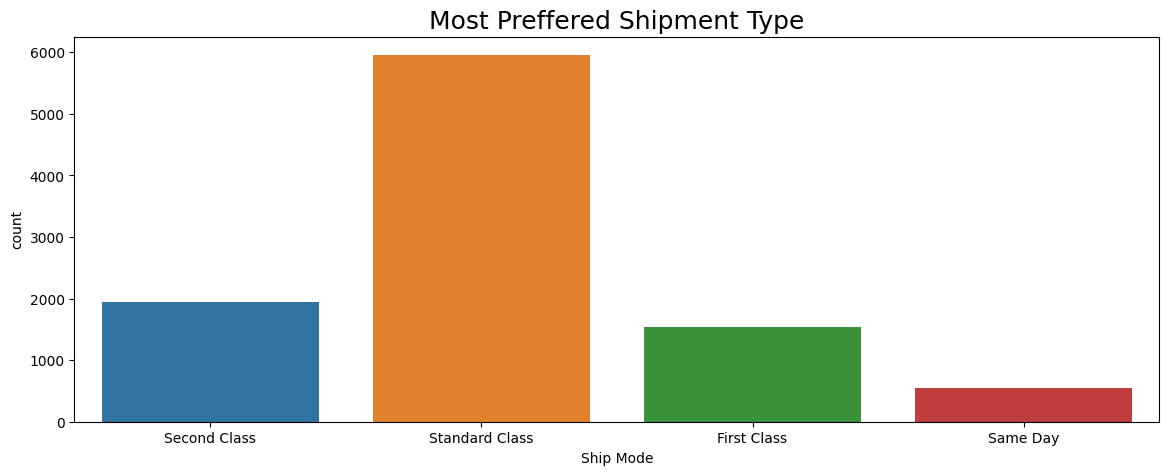

In [15]:
# Setting the chart size
plt.figure(figsize=(14,5))

# Plottong the values
sns.countplot(x= retail_df['Ship Mode'])

# Setting the title
plt.title('Most Preffered Shipment Type', fontsize=18)

# Show the chart
plt.show()

***Observation :*** We can see that the 'Standard Class' is the most prefferd type of shipment followed by second class.

Chart 2:
# **Highest customer segment**

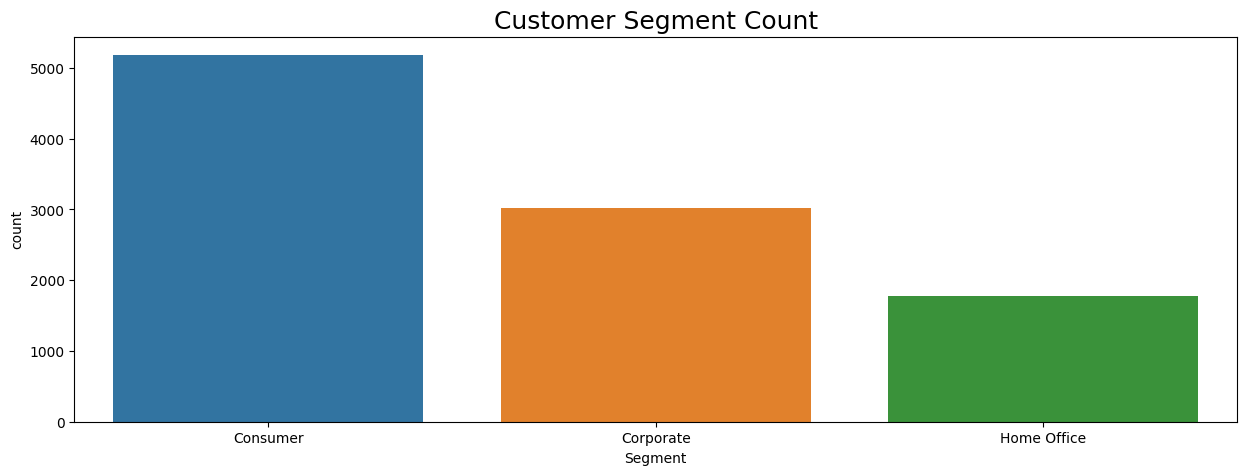

In [16]:
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values using countplot
sns.countplot(x=retail_df['Segment'])

# Setting the title
plt.title('Customer Segment Count',fontsize=18)

# Show the chart
plt.show()

**Observation:** We found out that "Consumer' is the number 1 customer segment.

Chart 3:
# **Which Region has the most number of Consumers?**

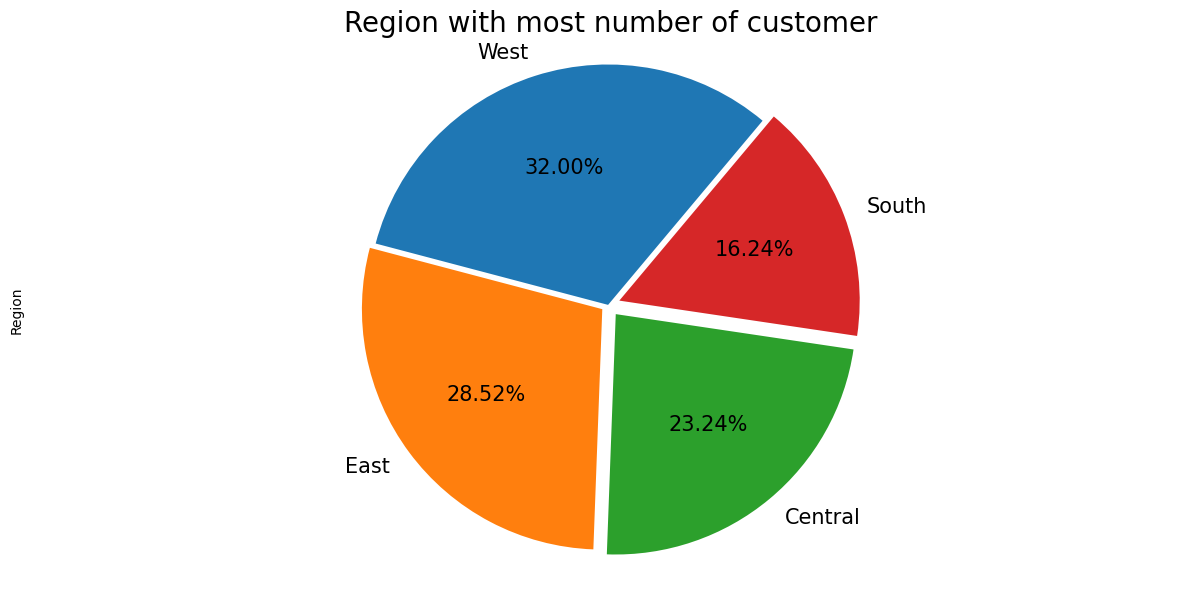

In [20]:
# Counting the Region values
reg = retail_df.Region.value_counts()

# Creating a explode data
explode = (0.00,0.03,0.05,0.05)

# Craeting a pie chart
reg.plot.pie(figsize=(15,7), explode= explode, autopct='%1.2f%%', shadow=False, fontsize=15,startangle=50)

# Setting the title
plt.title('Region with most number of customer', fontsize = 20)

# Setting the axis in centre
plt.axis('equal')

# Show Chart
plt.show()

**Observation :** We can see that most customers come from West.

Chart 4:
# **From which State most of the customers are?**

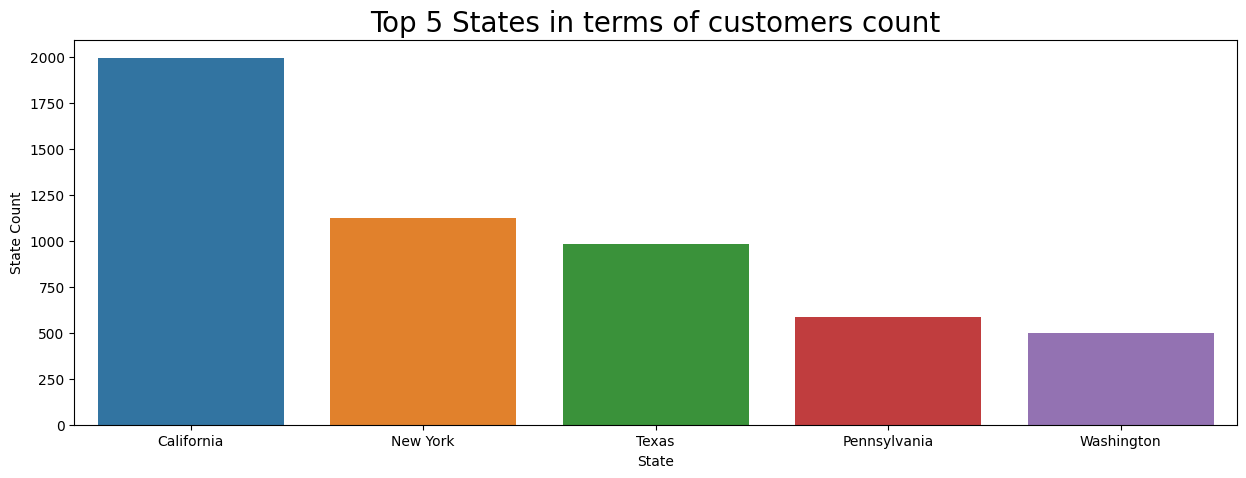

In [21]:
# Setting the chart size
plt.figure(figsize=(15,5))

# Creating a dataframe containing state name
State_df = retail_df['State'].value_counts().reset_index().rename(columns={'index':'State', 'State':'State Count'})

# Extracting top 5 states
State_df1 = State_df[:5]

# Plotting the values 
sns.barplot(x=State_df1['State'], y = State_df1['State Count'])

# Setting the title 
plt.title('Top 5 States in terms of customers count', fontsize=20)

# Show the chart
plt.show()

**Observation:** *After visualisation it is clear that the most customers come from 'California' State.*

Chart 5:
# **Top Cities from where customers are coming from**

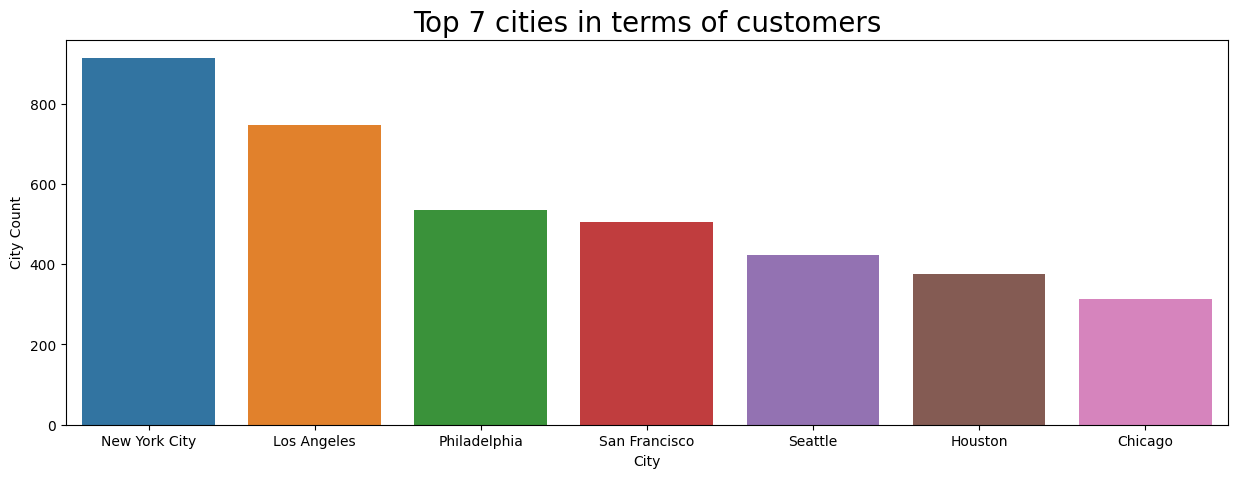

In [22]:
# Creating a dataframe containing city name

City = retail_df['City'].value_counts().reset_index().rename(columns={'index': 'City', 'City': 'City Count'})

# Extracting top 7 cities
Top7_city = City[:7]

# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values
sns.barplot(x=Top7_city['City'], y=Top7_city['City Count'])

# Setting the title
plt.title('Top 7 cities in terms of customers', fontsize=20)

#Show Chart
plt.show()

**Observation:** *Most customers come from 'New York City'.*

Chart 6:
# **Which Category has most sales?**

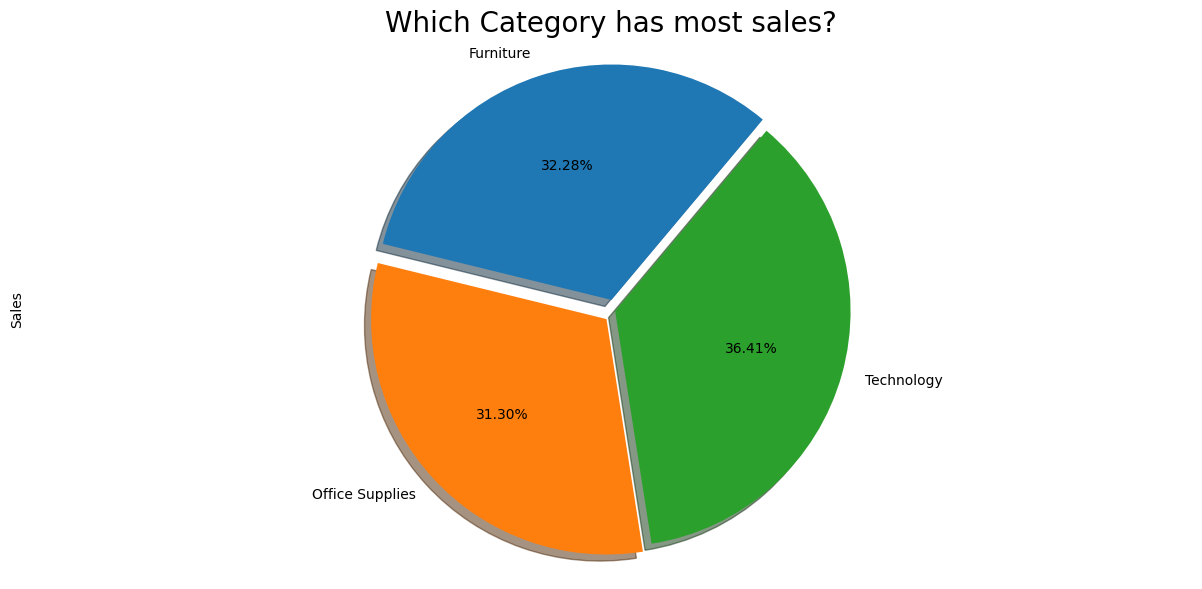

In [23]:
gcat = retail_df.groupby(['Category'])['Sales'].sum()
gcat.plot.pie(figsize=(15,7), explode=(0.05,0.05,0.00), shadow = True , autopct='%1.2f%%', startangle=50)
plt.title('Which Category has most sales?', fontsize=20)
plt.axis('equal')
plt.show()

**Obserrvation:** *Technology category has most sales followed by Furniture.*

Chart7:
# **Top 5 Sub Category in terms of sales?**

In [24]:
# Grouping the Sub-Category column on Sales
gsub_cat = retail_df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False)     # Sorting the values in descending order to get top values

# Extracting top 5 sub categories
top_gsc = gsub_cat[:5]
top_gsc

Sub-Category
Phones     330007.054
Chairs     327777.761
Storage    223843.608
Tables     206965.532
Binders    203409.169
Name: Sales, dtype: float64

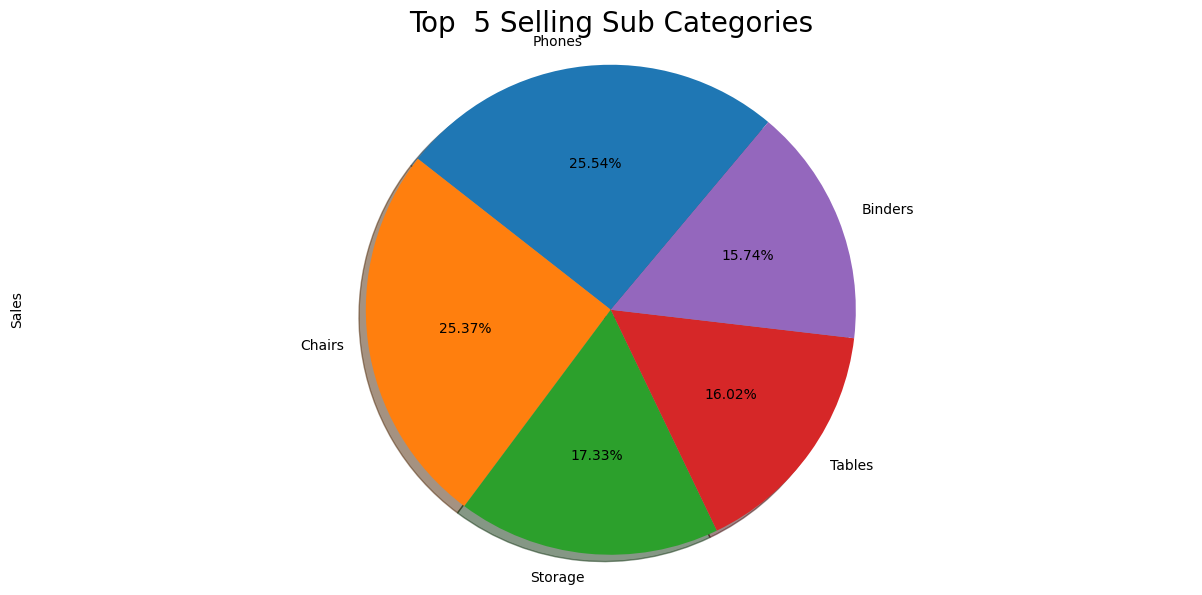

In [27]:
# Visualization Code
# Creating explode data

# Plotting the vslues in a pie chart
top_gsc.plot.pie(figsize=(15,7), shadow=True, autopct='%1.2f%%', startangle=50)

# Setting the title
plt.title('Top  5 Selling Sub Categories', fontsize=20)

# Setting the chart in centre
plt.axis('equal')

# Show the chart
plt.show()

**Observation:** *Most sale come from 2 categories 'Phones' and 'Chairs' respectively.*

Chart 8:
#**Which Category has given most profit?**

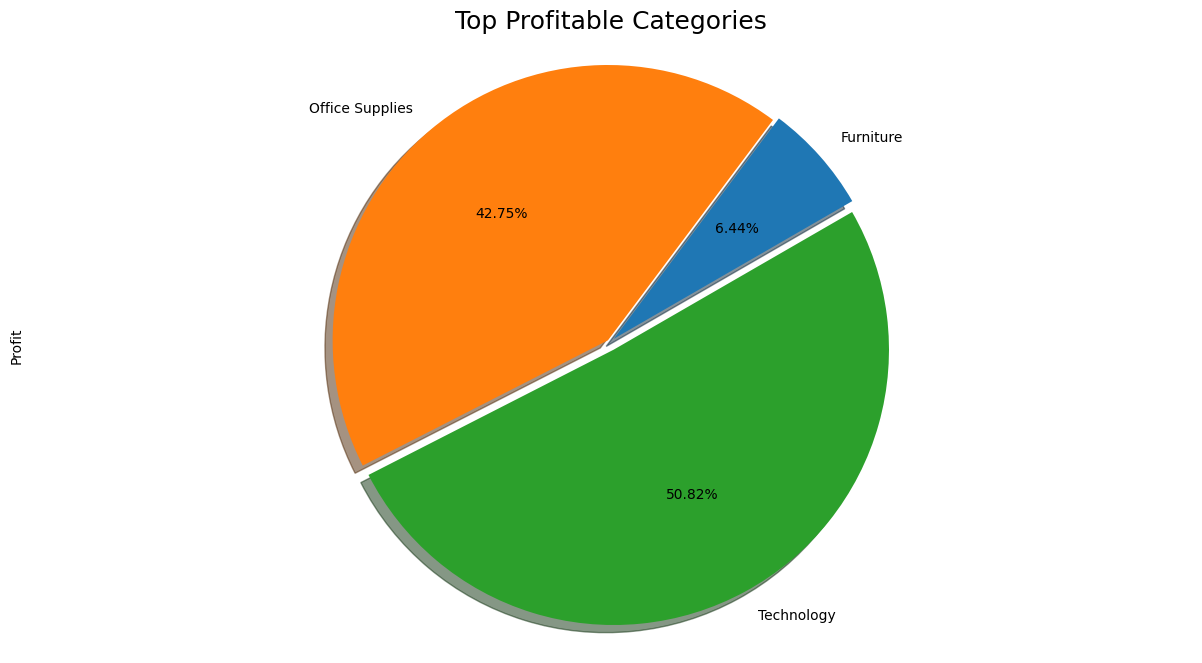

In [34]:
# Grouping the Category Column on sum of Profit
gcat_prof = retail_df.groupby(['Category'])['Profit'].sum()

# Plotting the vslues on a pie chart
gcat_prof.plot.pie(figsize=(15,8), explode=(0.02,0.01,0.03), shadow=True, autopct='%1.2f%%', startangle=30)

# Setting the title
plt.title('Top Profitable Categories', fontsize=18)

# Setting the chart in centre
plt.axis('equal')

# Show the chart
plt.show()

**Observation:** *'Technology' category is the most profitable category.*

Chart 9:
# **Top 5 profitable Sub-Category**

In [35]:
# Grouping the Sub-Category column on Profit
gsub_prof = retail_df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)    # Sorting the values in descending order

# Extracting top 5 profitable sub categories
top_prof_sc = gsub_prof[:5]
top_prof_sc

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          33944.2395
Binders        30228.0003
Name: Profit, dtype: float64

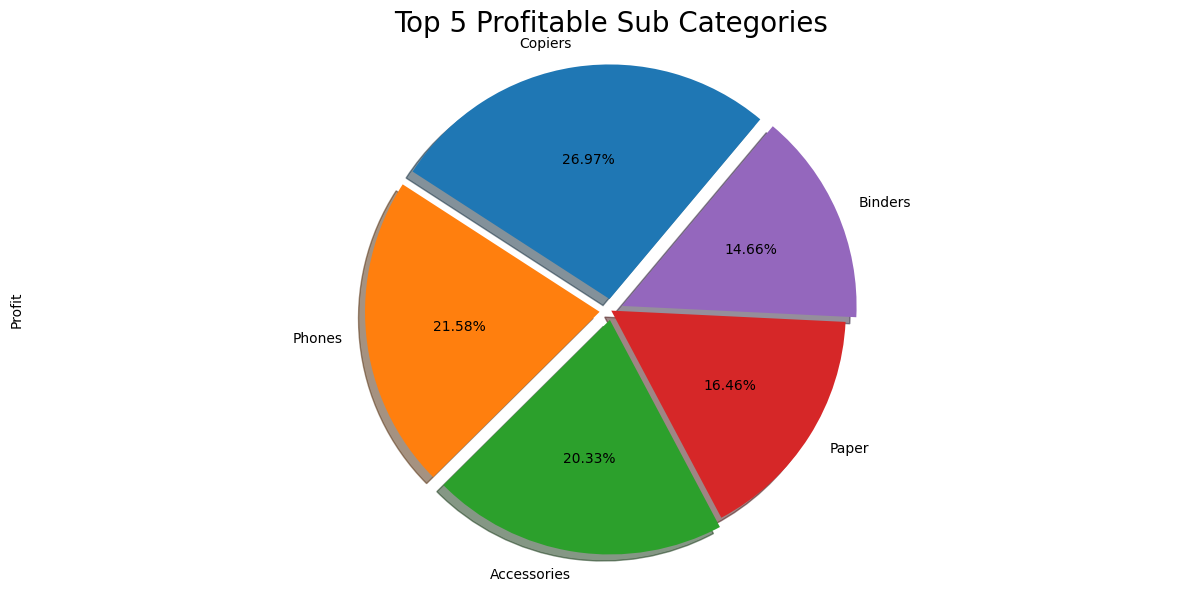

In [38]:
# Visualization code
# Creating explode data
explode = (0.05,0.05,0.04,0.00,0.05)

# Plotting the vslues in a pie chart
top_prof_sc.plot.pie(figsize=(15,7), explode=explode, shadow=True, autopct='%1.2f%%', startangle=50)

# Setting the title
plt.title('Top 5 Profitable Sub Categories', fontsize=20)

# Setting the chart in centre
plt.axis('equal')

# Show the chart
plt.show()

**Observation:** *'Cpiers' is the most profitable sub-category.*

Chart 10:
# **Which Category has most number of quantity sold?**

In [39]:
cat_sold = retail_df.groupby(['Category'])['Quantity'].sum().reset_index()
cat_sold

,Category,Quantity
0,Furniture,8020
1,Office Supplies,22861
2,Technology,6939


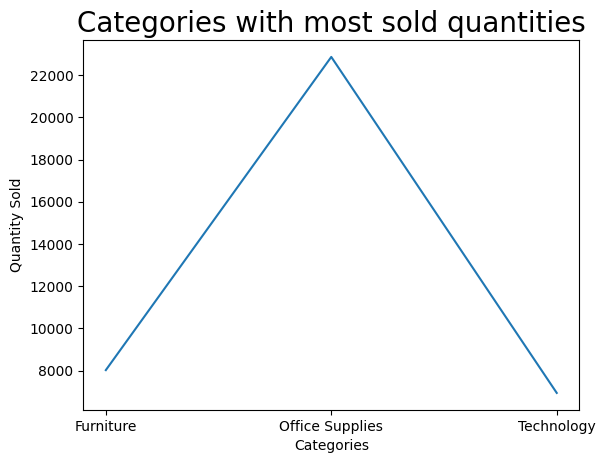

In [40]:
# Coverting columns into a list
Categories = list(cat_sold['Category'])
Quantities = list(cat_sold['Quantity'])

# Plotting the values
plt.plot(Categories, Quantities, label='Categories')

# Setting the x and y labels as title
plt.xlabel('Categories')
plt.ylabel('Quantity Sold')
plt.title('Categories with most sold quantities', fontsize=20)

# Show the chart
plt.show()

**Observation:** *'Office Supplies Categories' has the most quantities sold.*

Chart 11:
# **Top 5 Sub_Category with most quantities sold.**

In [41]:
subcat_sold = retail_df.groupby(['Sub-Category'])['Quantity'].sum().reset_index()
subcat_sold5 = subcat_sold[:5]
subcat_sold5

,Sub-Category,Quantity
0,Accessories,2976
1,Appliances,1729
2,Art,2996
3,Binders,5971
4,Bookcases,868


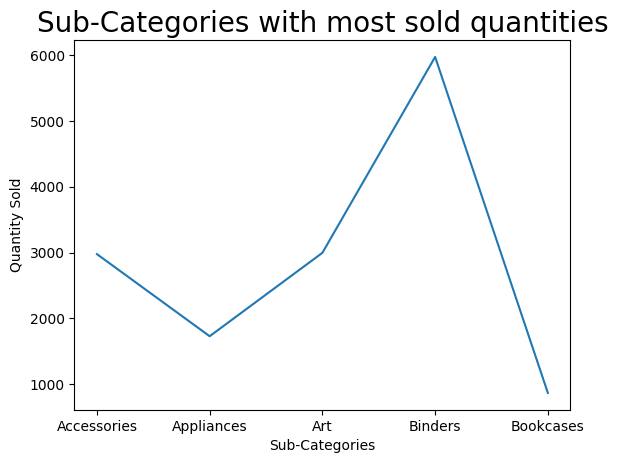

In [42]:
Sub_Categories = list(subcat_sold5['Sub-Category'])
SubCat_Quant = list(subcat_sold5['Quantity'])

# Plotting the values
plt.plot(Sub_Categories, SubCat_Quant, label='Sub-Categories')

# Setting the x and y labels as title
plt.xlabel('Sub-Categories')
plt.ylabel('Quantity Sold')
plt.title('Sub-Categories with most sold quantities', fontsize=20)

# Show the chart
plt.show()

**Observation:** *'Binders' sub-category has the most quantities sold.*

# **Conclusion:**
1. "Consumer' is the number 1 customer segment.
2. 'Standard Class' is the most prefferd type of shipment type followed by second class.
3. Most customers come from West Region.
4. Most customers come from 'California' State.
5. Most customers come from 'New York City'.
6. Technology category has most sales (36.4%) followed by Furniture.
7. Most sale come from 2 categories 'Phones'(25.54%) and 'Chairs'(25.3%) respectively.
8. 'Technology' category is the most profitable category (50.2% of overall).
9. 'Copiers' is the most profitable sub-category(27% approx of overall).
10. 'Office Supplies Categories' has the most quantities sold.
11. 'Binders' sub-category has the most quantities sold.